<a href="https://colab.research.google.com/github/marcoss00/fundamentos_ia_data_science/blob/master/Atividade_3_1_Multiplica%C3%A7%C3%A3o_de_matrizes_%7C_Redes_neurais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A

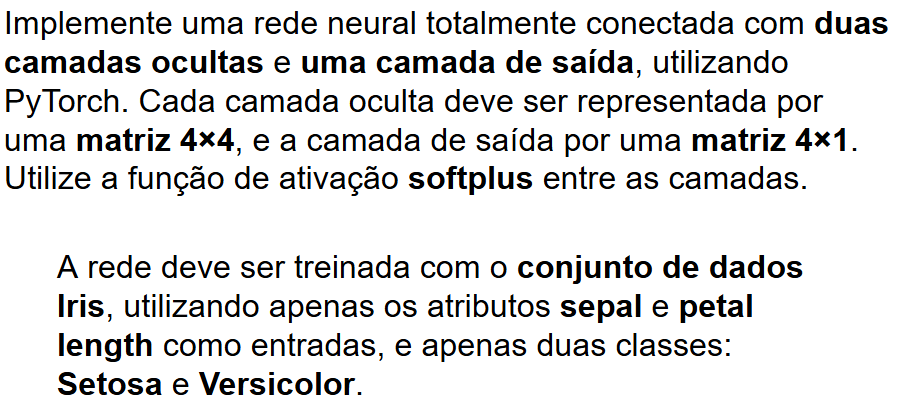

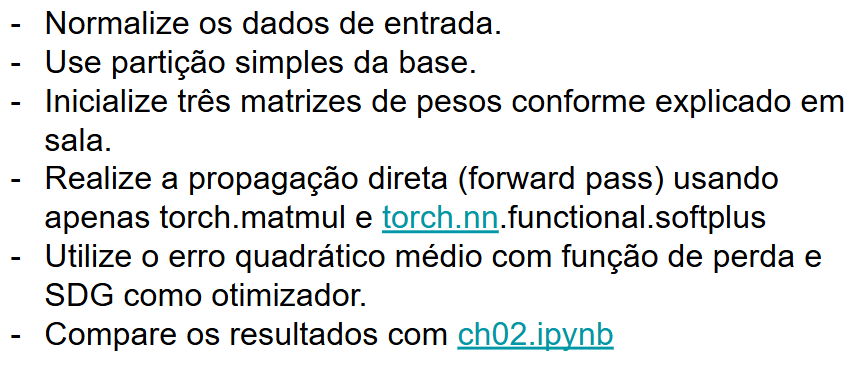

In [123]:
import torch
import torch.nn.functional as F
import torch.optim as optim
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [0, 2]]  # sepal length e petal length
y = iris.target

# Filtro apenas Setosa (0) e Versicolor (1)
filtro = y < 2
X = X[filtro]
y = y[filtro]

# Normalizar dados
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Converter para tensores do PyTorch
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Inicializar os pesos (2x4, 4x4, 4x1)
torch.manual_seed(42)
W1 = torch.randn(2, 4, requires_grad=True)  # Entrada -> 1ª oculta
W2 = torch.randn(4, 4, requires_grad=True)  # 1ª -> 2ª oculta
W3 = torch.randn(4, 1, requires_grad=True)  # 2ª oculta -> saída

# Otimizador SGD
otimizador = optim.SGD([W1, W2, W3], lr=0.1)

# Treinamento
for epoch in range(5000):
    # Forward pass
    h1 = F.softplus(torch.matmul(X_train, W1))        # (N x 4)
    h2 = F.softplus(torch.matmul(h1, W2))             # (N x 4)
    output = torch.matmul(h2, W3)                     # (N x 1)

    # Loss (erro quadrático médio)
    loss = F.mse_loss(output, y_train)

    # Backpropagation
    otimizador.zero_grad()
    loss.backward()
    otimizador.step()

    # Exibe progresso a cada 500 épocas
    if epoch % 500 == 0:
        print(f"Época {epoch}, Loss: {loss.item():.4f}")

# Avaliação
with torch.no_grad():
    h1 = F.softplus(torch.matmul(X_test, W1))
    h2 = F.softplus(torch.matmul(h1, W2))
    preds = torch.matmul(h2, W3)
    predicted_classes = (preds > 0.5).float()
    acc = (predicted_classes == y_test).float().mean()
    print(f"Acurácia no teste: {acc.item()*100:.2f}%")


Época 0, Loss: 0.4768
Época 500, Loss: 0.0494
Época 1000, Loss: 0.0316
Época 1500, Loss: 0.0244
Época 2000, Loss: 0.0197
Época 2500, Loss: 0.0161
Época 3000, Loss: 0.0132
Época 3500, Loss: 0.0111
Época 4000, Loss: 0.0097
Época 4500, Loss: 0.0090
Acurácia no teste: 100.00%


## Comparacao dos resultados com perceptron

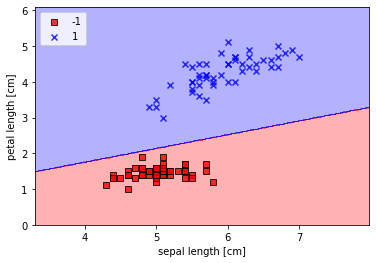

* Ambos os modelos obtiveram 100% de acurácia porque o problema é simples e linearmente separável.

* A vantagem da rede neural só se destaca em problemas não-lineares ou mais complexos, onde o perceptron falharia.

* Um modelo linear simples (como um perceptron) já é suficiente para resolver o problema perfeitamente.

# B

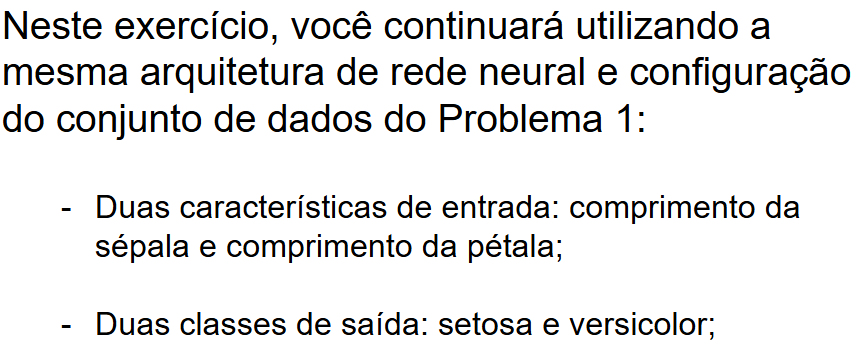

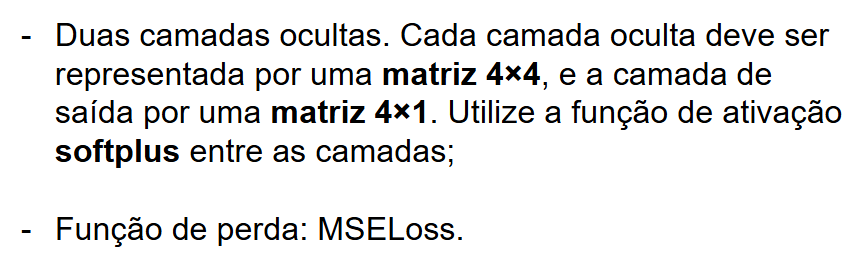

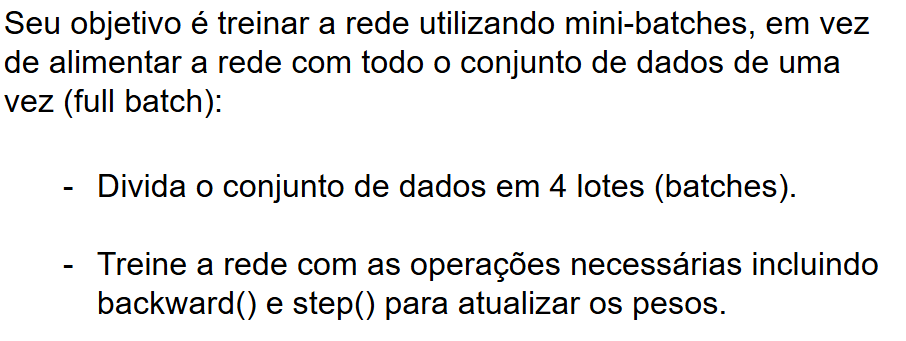

In [124]:
import torch
import torch.nn.functional as F
import torch.optim as optim
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Carregar dados
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]  # sepal length e petal length
y = iris.target

# Filtrar apenas Setosa e Versicolor
filtro = y < 2
X = X[filtro]
y = y[filtro]

# Normalizar
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Dividir dados
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Converter para tensores
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Inicializar pesos
torch.manual_seed(42)
W1 = torch.randn(2, 4, requires_grad=True)
W2 = torch.randn(4, 4, requires_grad=True)
W3 = torch.randn(4, 1, requires_grad=True)

# Otimizador
otimizador = optim.SGD([W1, W2, W3], lr=0.1)

# Tamanho de cada batch
batch_size = len(X_train) // 4  # 4 batches

# Treinamento com mini-batches
for epoch in range(5000):
    # Embaralhar os dados
    indices = torch.randperm(len(X_train))
    X_train = X_train[indices]
    y_train = y_train[indices]

    # Processar em batches
    for i in range(0, len(X_train), batch_size):
        X_batch = X_train[i:i+batch_size]
        y_batch = y_train[i:i+batch_size]

        # Forward pass
        h1 = F.softplus(torch.matmul(X_batch, W1))
        h2 = F.softplus(torch.matmul(h1, W2))
        output = torch.matmul(h2, W3)

        # Loss
        loss = F.mse_loss(output, y_batch)

        # Backpropagation
        otimizador.zero_grad()
        loss.backward()
        otimizador.step()

    # Mostrar progresso a cada 500 épocas
    if epoch % 500 == 0:
        print(f"Época {epoch}, Loss: {loss.item():.4f}")

# Avaliação
with torch.no_grad():
    h1 = F.softplus(torch.matmul(X_test, W1))
    h2 = F.softplus(torch.matmul(h1, W2))
    preds = torch.matmul(h2, W3)
    predicted_classes = (preds > 0.5).float()
    acc = (predicted_classes == y_test).float().mean()
    print(f"Acurácia no teste: {acc.item()*100:.2f}%")


Época 0, Loss: 17.2178
Época 500, Loss: 0.0068
Época 1000, Loss: 0.0055
Época 1500, Loss: 0.0063
Época 2000, Loss: 0.0019
Época 2500, Loss: 0.0021
Época 3000, Loss: 0.0032
Época 3500, Loss: 0.0017
Época 4000, Loss: 0.0012
Época 4500, Loss: 0.0014
Acurácia no teste: 100.00%


# C

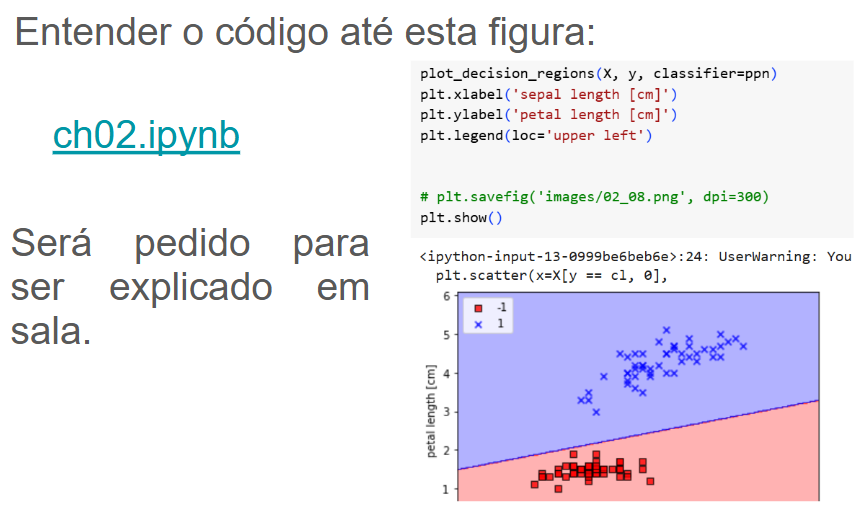

[ch02.ipynb](https://colab.research.google.com/github/marcoss00/fundamentos_ia_data_science/blob/master/PML_CodeEx-ch02.ipynb)

# D

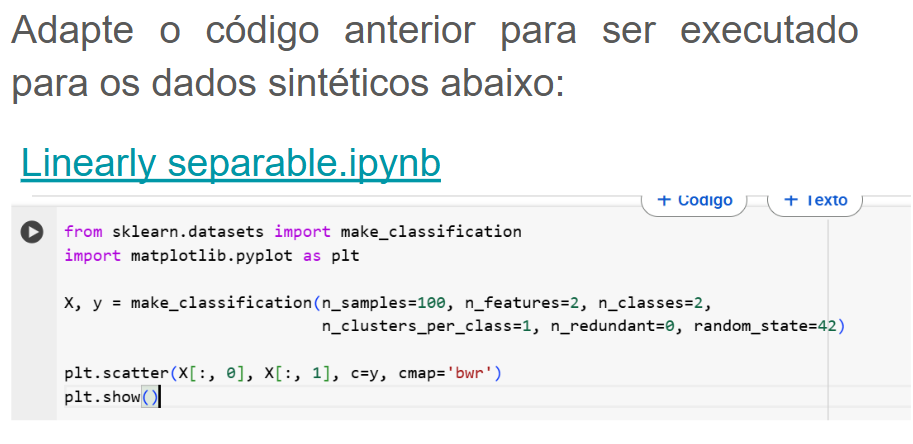

## An object-oriented perceptron API

In [125]:
import numpy as np


class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

## Dados sintéticos

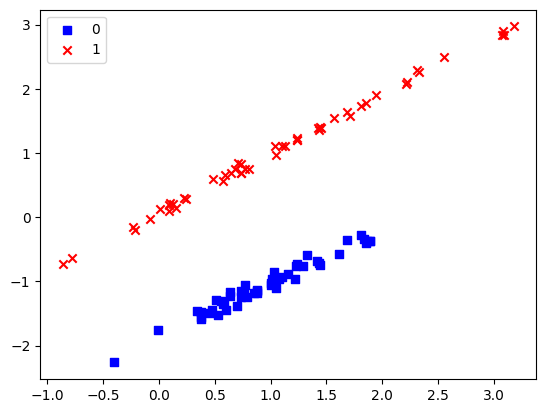

In [126]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

X, y = make_classification(n_samples=100, n_features=2, n_classes=2,
                           n_clusters_per_class=1, n_redundant=0, random_state=42)

X0 = X[y == 0]
X1 = X[y == 1]

plt.scatter(X0[:, 0], X0[:, 1], marker='s', color='blue', label='0')
plt.scatter(X1[:, 0], X1[:, 1], marker='x', color='red', label='1')

plt.legend()
plt.show()

## Training the perceptron model

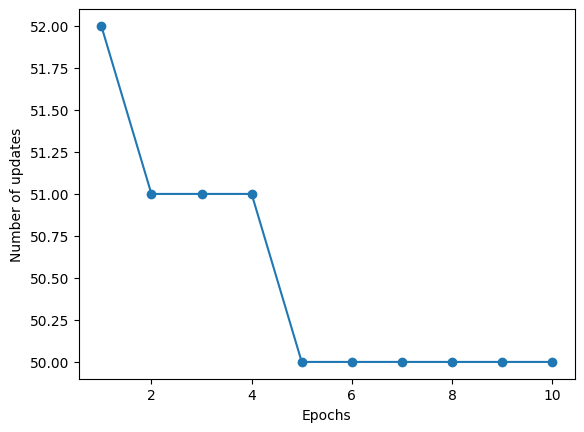

In [127]:
ppn = Perceptron(eta=0.1, n_iter=10)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

# plt.savefig('images/02_07.png', dpi=300)
plt.show()

## A function for plotting decision regions

In [128]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('blue', 'red', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

/tmp/ipython-input-128-618018625.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


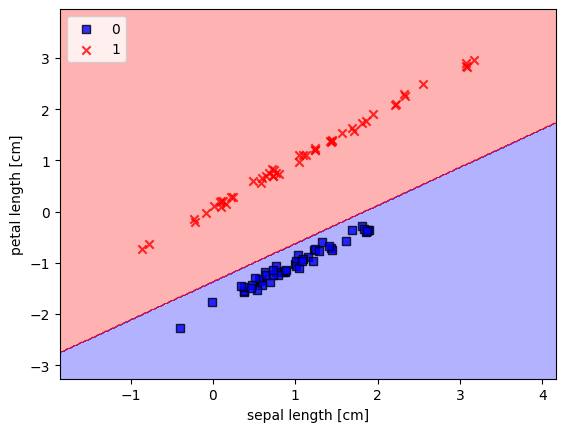

In [129]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')


# plt.savefig('images/02_08.png', dpi=300)
plt.show()

# E

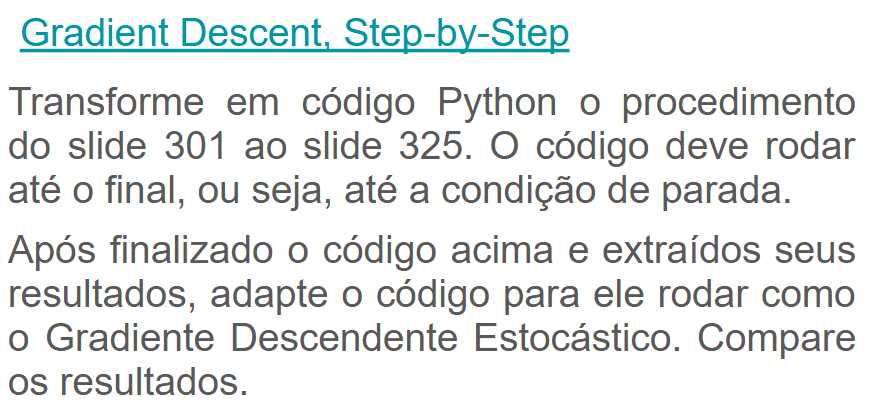

## Batch Gradient Descent

In [130]:
x_dados = [0.5, 2.3, 2.9]
y_dados = [1.4, 1.9, 3.2]

intercept = 0.0
slope = 1

learning_rate = 0.01
epochs = 1000
limite = 1 * 10**-6

# Treinamento com gradiente descendente
for epoch in range(epochs):
    d_intercept = 0
    d_slope = 0
    for x, y in zip(x_dados, y_dados):
        y_pred = intercept + slope * x
        error = y - y_pred
        d_intercept += -2 * error
        d_slope += -2 * x * error

    # Calcula o tamanho dos passos
    delta_intercept = learning_rate * d_intercept
    delta_slope = learning_rate * d_slope

    # Atualização dos parâmetros
    intercept -= delta_intercept
    slope -= delta_slope

    total_error = sum((y - (intercept + slope * x))**2 for x, y in zip(x_dados, y_dados))

    # print a cada 100 iterações
    if (epoch + 1) % 100 == 0 or epoch == 0:
        print(f"Época {epoch+1:3}: Intercept = {intercept:.4f}, Slope = {slope:.4f}, Erro = {total_error:.5f}")

    # Condição de parada: passo muito pequeno
    if abs(delta_intercept) < limite and abs(delta_slope) < limite:
        print(f"Época {epoch+1:3}: Intercept = {intercept:.4f}, Slope = {slope:.4f}, Erro = {total_error:.5f}")
        break

Época   1: Intercept = 0.0160, Slope = 1.0080, Erro = 1.03112
Época 100: Intercept = 0.6533, Slope = 0.7669, Erro = 0.50352
Época 200: Intercept = 0.8552, Slope = 0.6809, Erro = 0.45053
Época 300: Intercept = 0.9191, Slope = 0.6537, Erro = 0.44521
Época 400: Intercept = 0.9393, Slope = 0.6450, Erro = 0.44467
Época 500: Intercept = 0.9457, Slope = 0.6423, Erro = 0.44462
Época 600: Intercept = 0.9478, Slope = 0.6414, Erro = 0.44462
Época 700: Intercept = 0.9484, Slope = 0.6412, Erro = 0.44462
Época 800: Intercept = 0.9486, Slope = 0.6411, Erro = 0.44462
Época 808: Intercept = 0.9486, Slope = 0.6411, Erro = 0.44462


## SGD

In [131]:
import random

x_dados = [0.5, 2.3, 2.9]
y_dados = [1.4, 1.9, 3.2]

intercept = 0.0
slope = 1

learning_rate = 0.01
epochs = 1000
limite = 1 * 10**-6

for epoch in range(epochs):
    # Embaralha os dados a cada época
    indices = list(range(len(x_dados)))
    random.shuffle(indices)

    for i in indices:
        x = x_dados[i]
        y = y_dados[i]

        y_pred = intercept + slope * x
        error = y - y_pred

        d_intercept = -2 * error
        d_slope = -2 * x * error

        delta_intercept = learning_rate * d_intercept
        delta_slope = learning_rate * d_slope

        intercept -= delta_intercept
        slope -= delta_slope

    total_error = sum((y - (intercept + slope * x))**2 for x, y in zip(x_dados, y_dados))

    if (epoch + 1) % 100 == 0 or epoch == 0:
        print(f"Época {epoch+1:3}: Intercept = {intercept:.4f}, Slope = {slope:.4f}, Erro = {total_error:.5f}")

    if abs(delta_intercept) < limite and abs(delta_slope) < limite:
        print(f"Época {epoch+1:3}: Intercept = {intercept:.4f}, Slope = {slope:.4f}, Erro = {total_error:.5f}")
        break

Época   1: Intercept = 0.0172, Slope = 1.0116, Erro = 1.02823
Época 100: Intercept = 0.6513, Slope = 0.7754, Erro = 0.50629
Época 200: Intercept = 0.8474, Slope = 0.6831, Erro = 0.45151
Época 300: Intercept = 0.9082, Slope = 0.6535, Erro = 0.44595
Época 400: Intercept = 0.9331, Slope = 0.6577, Erro = 0.44625
Época 500: Intercept = 0.9357, Slope = 0.6494, Erro = 0.44486
Época 600: Intercept = 0.9363, Slope = 0.6487, Erro = 0.44481
Época 700: Intercept = 0.9380, Slope = 0.6446, Erro = 0.44470
Época 800: Intercept = 0.9384, Slope = 0.6486, Erro = 0.44484
Época 900: Intercept = 0.9378, Slope = 0.6477, Erro = 0.44476
Época 1000: Intercept = 0.9363, Slope = 0.6454, Erro = 0.44473


## Comparação de resultados

* O BGD apresenta atualizações mais suaves, com o erro caindo consistentemente.

* O SGD tem pequenas flutuações no erro e nos parâmetros, que é esperado devido à sua natureza estocástica (amostragem individual).

* O BGD atingiu o critério de parada antes do limite de épocas (época 808).

* O SGD não atingiu o critério de convergência mesmo após 1000 épocas.

* Ambos os métodos convergem para valores muito próximos de intercepto, slope e erro: 0.44462 (BGD) e 0.44480 (SGD).

A condição de parada baseada em delta_intercept e delta_slope só funcionou bem em Batch Gradient Descent, porque:

* No Batch GD, os gradientes são acumulados sobre todos os dados, então os valores de delta_intercept e delta_slope vão ficando cada vez menores conforme a função de custo converge.

* Já no SGD, cada atualização é feita com apenas um ponto de dado, então os gradientes sofrem muita oscilação (mesmo quando já estamos próximos do mínimo da função de erro).

# F

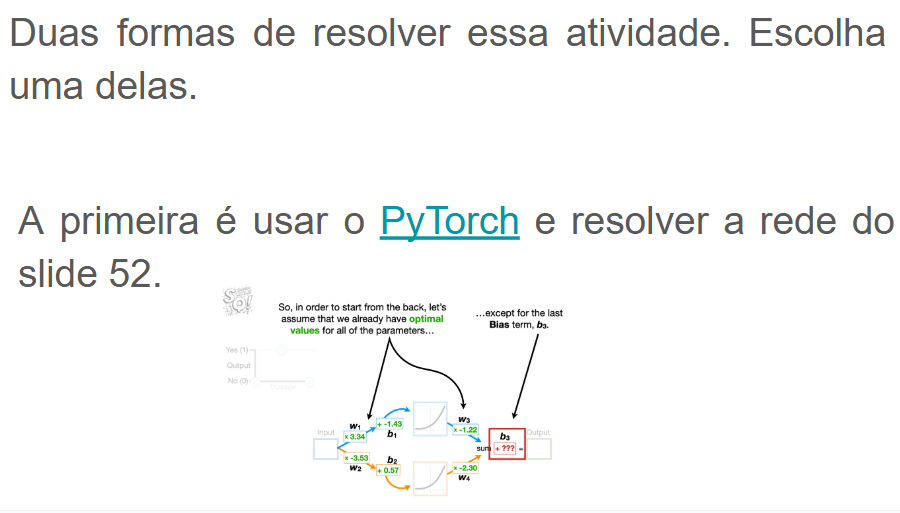

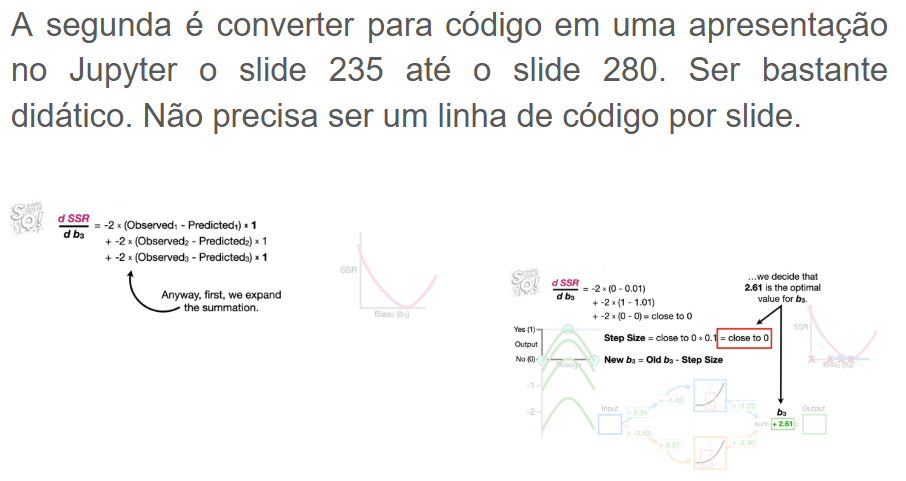

In [132]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

activation = F.softplus

w1 = torch.tensor(3.34)
b1 = torch.tensor(-1.43)
w2 = torch.tensor(-3.53)
b2 = torch.tensor(0.57)
w3 = torch.tensor(-1.22)
w4 = torch.tensor(-2.30)

b3 = torch.tensor(0.0, requires_grad=True)

x_data = torch.tensor([0.0, 0.5, 1.0])
y_target = torch.tensor([0.0, 1.0, 0.0])

# Otimizador apenas para b3
optimizer = optim.SGD([b3], lr=0.01)
loss_fn = nn.MSELoss()

# Treinamento
for epoch in range(1000):
    # Propagação direta
    z1 = w1 * x_data + b1
    a1 = activation(z1)

    z2 = w2 * x_data + b2
    a2 = activation(z2)

    y_pred = w3 * a1 + w4 * a2 + b3

    # Cálculo do erro
    loss = loss_fn(y_pred, y_target)

    # Backpropagation e otimização
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Loss = {loss.item():.4f}, b3 = {b3.item():.4f}")

print(f"\nBias final b3 ajustado: {b3.item():.4f}")


Epoch 0: Loss = 6.8079, b3 = 0.0522
Epoch 100: Loss = 0.1198, b3 = 2.2701
Epoch 200: Loss = 0.0021, b3 = 2.5642
Epoch 300: Loss = 0.0001, b3 = 2.6032
Epoch 400: Loss = 0.0000, b3 = 2.6084
Epoch 500: Loss = 0.0000, b3 = 2.6091
Epoch 600: Loss = 0.0000, b3 = 2.6092
Epoch 700: Loss = 0.0000, b3 = 2.6092
Epoch 800: Loss = 0.0000, b3 = 2.6092
Epoch 900: Loss = 0.0000, b3 = 2.6092

Bias final b3 ajustado: 2.6092


# G

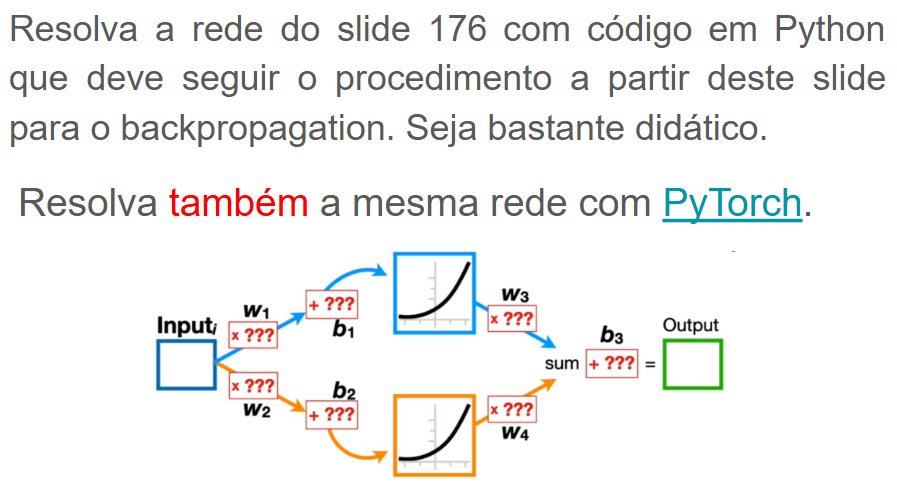

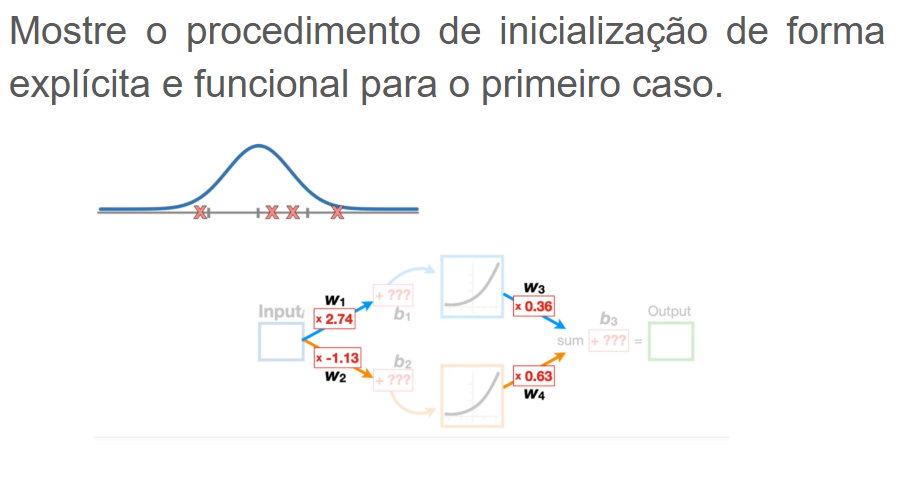

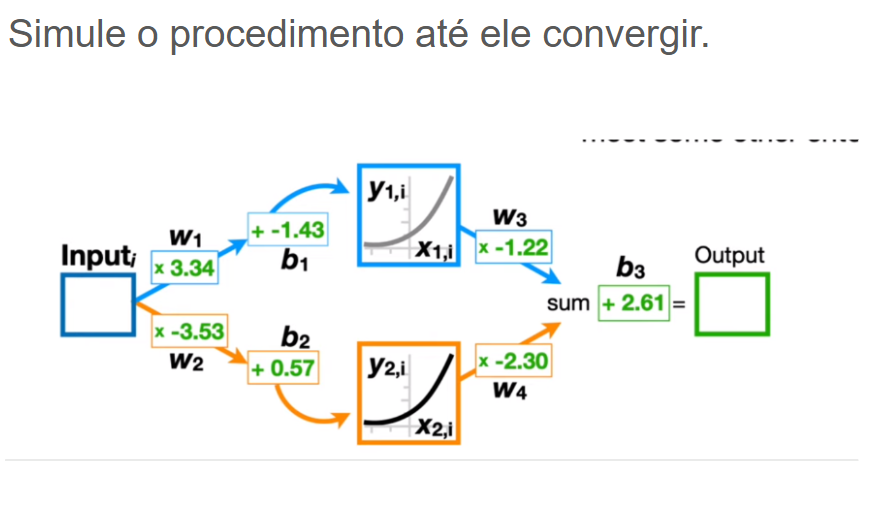

In [138]:
import random
import math

def softplus(x):
    return math.log(1 + math.exp(x))

# Derivada do softplus
def d_softplus(x):
    return 1 / (1 + math.exp(-x))

# Inicialização dos pesos com distribuição normal (média=0, std=1)
def init_peso():
    return random.gauss(0, 1)

w1 = init_peso()
w2 = init_peso()
w3 = init_peso()
w4 = init_peso()

b1 = 0
b2 = 0
b3 = 0

print("\nParâmetros iniciais:")
print(f"w1 = {w1:.4f}, b1 = {b1:.4f}")
print(f"w2 = {w2:.4f}, b2 = {b2:.4f}")
print(f"w3 = {w3:.4f}, w4 = {w4:.4f}, b3 = {b3:.4f}\n")

x_data = [0.0, 0.5, 1.0, 0.4, 0.6, 0.1, 0.2, 0.9, 0.45, 0.55, 0.65]
y_target = [0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0]

lr = 0.01
epochs = 5000
n = len(x_data)

for epoch in range(epochs):
    # Gradientes acumulados para cada parâmetro
    grad_w1 = 0.0
    grad_b1 = 0.0
    grad_w2 = 0.0
    grad_b2 = 0.0
    grad_w3 = 0.0
    grad_w4 = 0.0
    grad_b3 = 0.0
    loss = 0.0

    for i in range(n):
        x = x_data[i]
        y = y_target[i]

        # Forward pass
        z1 = w1 * x + b1
        a1 = softplus(z1)

        z2 = w2 * x + b2
        a2 = softplus(z2)

        y_pred = w3 * a1 + w4 * a2 + b3

        # Erro (MSE)
        error = y_pred - y
        loss += error**2

        # Backpropagation (derivadas parciais)

        # dLoss/dy_pred = 2 * (y_pred - y)
        dL_dypred = 2 * error

        # Gradientes para w3, w4 e b3
        grad_w3 += dL_dypred * a1
        grad_w4 += dL_dypred * a2
        grad_b3 += dL_dypred * 1

        # Gradientes para a1 e a2
        dL_da1 = dL_dypred * w3
        dL_da2 = dL_dypred * w4

        # Gradientes para z1 e z2 via derivada do softplus
        dL_dz1 = dL_da1 * d_softplus(z1)
        dL_dz2 = dL_da2 * d_softplus(z2)

        # Gradientes para w1, b1, w2, b2
        grad_w1 += dL_dz1 * x
        grad_b1 += dL_dz1 * 1

        grad_w2 += dL_dz2 * x
        grad_b2 += dL_dz2 * 1

    # Média do loss para o batch
    loss /= n

    # Atualização dos pesos (descida do gradiente)
    w1 -= lr * (grad_w1 / n)
    b1 -= lr * (grad_b1 / n)
    w2 -= lr * (grad_w2 / n)
    b2 -= lr * (grad_b2 / n)
    w3 -= lr * (grad_w3 / n)
    w4 -= lr * (grad_w4 / n)
    b3 -= lr * (grad_b3 / n)

    if epoch % 1000 == 0:
        print(f"Epoch {epoch}: Loss = {loss:.5f}")

print("\nParâmetros finais:")
print(f"w1 = {w1:.4f}, b1 = {b1:.4f}")
print(f"w2 = {w2:.4f}, b2 = {b2:.4f}")
print(f"w3 = {w3:.4f}, w4 = {w4:.4f}, b3 = {b3:.4f}")



Parâmetros iniciais:
w1 = -0.7773, b1 = 0.0000
w2 = 0.8810, b2 = 0.0000
w3 = -0.0063, w4 = 1.3312, b3 = 0.0000

Epoch 0: Loss = 0.76277
Epoch 1000: Loss = 0.24545
Epoch 2000: Loss = 0.24381
Epoch 3000: Loss = 0.24289
Epoch 4000: Loss = 0.24200

Parâmetros finais:
w1 = -0.9026, b1 = 0.0044
w2 = 0.2389, b2 = -0.1072
w3 = -0.3037, w4 = 1.0744, b3 = -0.0519


## Com Pytorch

In [137]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

activation = F.softplus

w1 = torch.randn(1, requires_grad=True)
w2 = torch.randn(1, requires_grad=True)
w3 = torch.randn(1, requires_grad=True)
w4 = torch.randn(1, requires_grad=True)

b1 = torch.tensor(0.0, requires_grad=True)
b2 = torch.tensor(0.0, requires_grad=True)
b3 = torch.tensor(0.0, requires_grad=True)

print("\nParâmetros iniciais:")
print(f"w1 = {w1.item():.4f}, b1 = {b1.item():.4f}")
print(f"w2 = {w2.item():.4f}, b2 = {b2.item():.4f}")
print(f"w3 = {w3.item():.4f}, w4 = {w4.item():.4f}, b3 = {b3.item():.4f}\n")

x_data = torch.tensor([0.0, 0.5, 1.0, 0.4, 0.6, 0.1, 0.2, 0.9, 0.45, 0.55, 0.65])
y_target = torch.tensor([0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0])

params = [w1, b1, w2, b2, w3, w4, b3]
optimizer = optim.SGD(params, lr=0.01)
loss_fn = nn.MSELoss()

# Treinamento
for epoch in range(5000):
    # Forward pass
    z1 = w1 * x_data + b1
    a1 = activation(z1)

    z2 = w2 * x_data + b2
    a2 = activation(z2)

    y_pred = w3 * a1 + w4 * a2 + b3

    # Erro
    loss = loss_fn(y_pred, y_target)

    # Backpropagation e otimização
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 1000 == 0:
        print(f"Epoch {epoch}: Loss = {loss.item():.5f}")

print("\nParâmetros finais:")
print(f"w1 = {w1.item():.4f}, b1 = {b1.item():.4f}")
print(f"w2 = {w2.item():.4f}, b2 = {b2.item():.4f}")
print(f"w3 = {w3.item():.4f}, w4 = {w4.item():.4f}, b3 = {b3.item():.4f}")



Parâmetros iniciais:
w1 = 1.2096, b1 = 0.0000
w2 = -1.7903, b2 = 0.0000
w3 = 0.3377, w4 = 1.1959, b3 = 0.0000

Epoch 0: Loss = 0.38347
Epoch 1000: Loss = 0.26388
Epoch 2000: Loss = 0.25660
Epoch 3000: Loss = 0.25252
Epoch 4000: Loss = 0.24951

Parâmetros finais:
w1 = 1.0198, b1 = 0.2127
w2 = -1.3001, b2 = -0.4116
w3 = 0.3788, w4 = 0.0390, b3 = 0.1059
